# Deep Feedward Networks
## Learning XOR

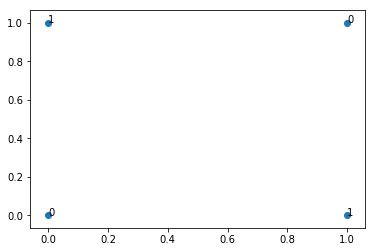

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])[:, None]
b = np.ones([4, 1])

plt.figure("XOR")
plt.scatter(X[:,0], X[:,1])
for index, point in enumerate(X):
    plt.text(point[0], point[1], str(Y[index,0]))

In [4]:
# linear function : y = wX + b
# add bias column for X
X_ = np.column_stack((b, X))
# normal equation
theta = np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, Y))
theta

array([[ 0.5],
       [ 0. ],
       [ 0. ]])

So weights are [[0], [0]] and bias is [[0.5]], linear function turn to y = 0.5, it's obvious wrong for all the four points. Let's introduce feed forward netwoks to solve this problem.

Add one hidden layer by activation function Relu(Rectified linear unit), it's default recommendation in modern neural networks.

It's definition is:
    
    g(z) = max{0, z}
    
Now we can get the new formula to fit XOR:
    
    fx_1 = w_1*X + b_1
    hx = Relu(fx_1) = max{0, w_1*X + b_1}
    fx_2 = w_2*hx + b_2 = w_2*max{0, w_1*X + b_1} + b_2

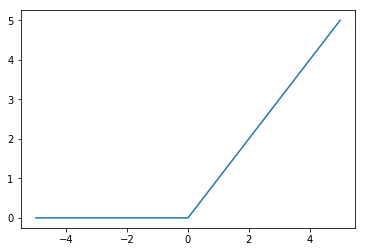

In [5]:
# Relu
plt.figure('Relu')
temp_x = np.linspace(-5, 5, 20, dtype='int8')
temp_y = temp_x * (temp_x > 0)  
plt.plot(temp_x, temp_y)

In [6]:
# specify weights and bias directly
w_1 = np.array([[1, 1], [1, 1]])
w_2 = np.array([1, -2])
b_1 = np.array([0, -1])
b_2 = 0

fx_1 = np.dot(X, w_1) + b_1
hx = fx_1 * (fx_1 > 0) # relu
fx_2 = np.dot(hx, w_2[:,None]) + b_2
fx_2 == Y

array([[ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

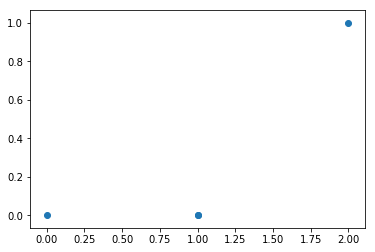

In [7]:
plt.figure('transformed-space')
plt.scatter(hx[:,0], hx[:,1])

## Maximum Likelihood Estimation
[cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy)

<img src="../pic/mle.jpg" width = "500" height = "300" alt="formula" align=center/>

## Back-Propagation
A simple version according to the [course](https://www.coursera.org/learn/machine-learning/home/welcome) of Andrew Ng.

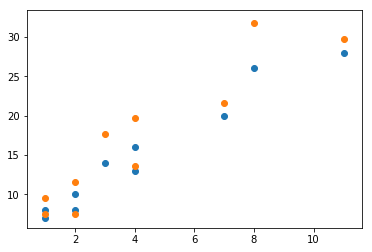

In [8]:
learning_rate = 0.001
x_train = np.array([[1, 2], [2, 1], [2, 3], [3, 5], [1, 3], [4, 2], [7, 3], [4, 5], [11, 3], [8, 7]])
y_train = np.array([7, 8, 10, 14, 8, 13, 20, 16, 28, 26])

w = np.random.normal(size=(1,2))
b = 1
loss_r = []

def loss():
    return np.linalg.norm(np.dot(w, x_train.T) + b - y_train) / 2

for i in range(10):
    w_delta = np.dot(y_train - np.dot(w, x_train.T) + b, x_train)
    b_delta = np.sum(y_train - np.dot(w, x_train.T) + b )

    w += learning_rate * w_delta
    b += learning_rate * b_delta
    loss_r.append(loss())

prediction = np.dot(w, x_train.T) + b
plt.figure('golden_vs_prediction')
plt.scatter(x_train[:,0], y_train)
plt.scatter(x_train[:,0], prediction.reshape(10,1))

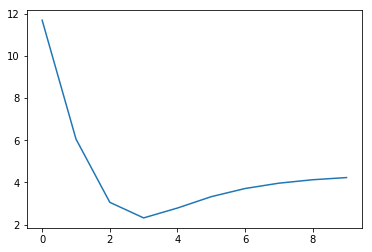

In [9]:
plt.figure('loss')
plt.plot(range(10), loss_r)

A simple implementation of tensorflow [mnist-softmax tutorial](https://www.tensorflow.org/get_started/mnist/beginners). There are two blogs about softmax derivative and loss calculation in [here](http://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/) and [here](https://zhuanlan.zhihu.com/p/27223959). And the [assignment1](http://cs224d.stanford.edu/assignment1/index.html) from css224n for nlp is pretty awesome for beginer, the complete code can be found [here](https://github.com/AppleFairy/CS224n-Natural-Language-Processing-with-Deep-Learning/tree/master/assignment/assignment1).

Extracting ../data/mnist\train-images-idx3-ubyte.gz
Extracting ../data/mnist\train-labels-idx1-ubyte.gz
Extracting ../data/mnist\t10k-images-idx3-ubyte.gz
Extracting ../data/mnist\t10k-labels-idx1-ubyte.gz
step 0 accuracy=0.109375
step 5000 accuracy=0.7578125
step 10000 accuracy=0.828125
step 15000 accuracy=0.796875
step 20000 accuracy=0.84375
step 25000 accuracy=0.84375
step 30000 accuracy=0.8828125
step 35000 accuracy=0.8828125
step 40000 accuracy=0.859375
step 45000 accuracy=0.8671875
step 50000 accuracy=0.8828125
step 55000 accuracy=0.84375
step 60000 accuracy=0.8984375
step 65000 accuracy=0.8828125
step 70000 accuracy=0.8203125
step 75000 accuracy=0.859375
step 80000 accuracy=0.9375
step 85000 accuracy=0.8984375
step 90000 accuracy=0.9140625
step 95000 accuracy=0.9296875
step 100000 accuracy=0.859375


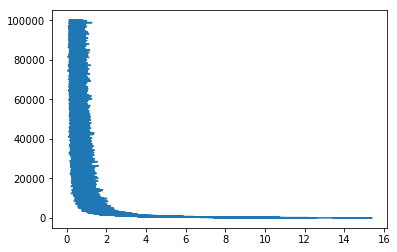

In [10]:
%run ../example/mnist_mlp_simple.py